In [3]:
import numpy as np 
import pandas as pd 
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
df=pd.read_csv('tweets.csv')
print(df.shape)
df.head()

(11370, 5)


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
#Checking for Null values
df.isna().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [6]:
#Exploring the target columns
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

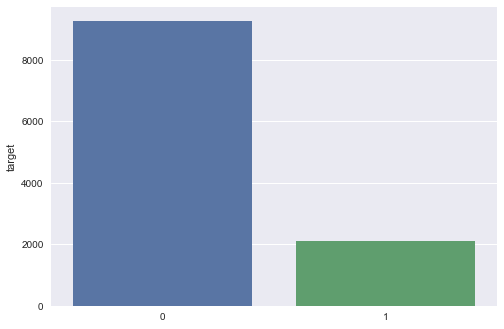

In [7]:
plt.style.use('seaborn')
sns.barplot(df['target'].value_counts().index,df['target'].value_counts())

In [8]:
# 10 disaster tweets 
disaster_tweets=df[df['target']==1]['text']
for i in range(10):
    print(disaster_tweets.values[i])
    print('\n')

Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…


Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…


Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI


Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9


Several houses have been set ablaze in Ngemsibaa village, Oku sub division in the North West Region of Cameroon by… https://t.co/99uHGAzxy2


Asansol: A BJP office in Salanpur village was set ablaze last night. BJP has alleged that TMC is behind the incident. Police has b…


Images showing the havoc caused by the #Cameroon military as they torched houses in #Oku.The shameless military is reported…


Hausa youths set Area Office of Apapa-Iganmu Local Council Development Area ablaze. Okada Riders stormed the LG area office…


Under #MamataBanerjee political violence &amp; vanda

In [9]:
# 10 non_disaster tweets 
non_disaster_tweets=df[df['target']==0]['text']
for i in range(10):
    print(non_disaster_tweets.values[i])
    print('\n')

"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8


If this child was Chinese, this tweet would have gone viral. Social media would be ablaze. SNL would have made a racist j…


National Security Minister, Kan Dapaah's side chic has set the internet ablaze with her latest powerful video.… https://t.co/rhzOMQVSlj


This creature who’s soul is no longer clarent but blue ablaze This thing Carrying memories Memories of… https://t.co/tBKSNDrDoX


Social media went bananas after Chuba Hubbard announced Monday evening his plans to return to #okstate. https://t.co/peN…


AMEN! Set the whole system ablaze, man. https://t.co/J08xHDcGbD


Rengoku sets my heart ablaze😔❤️🔥 P.s. I missed this style of coloring I do so here it is c: #鬼滅の刃 https://t.co/YrUF9g68s0


paulzizkaphoto: “Rundle Ablaze” Wishing you all a good evening... https://t.co/d0NlME1HQz https://t.co/hlVlT6qiIp


#ThankfulTuesday Isaiah 43:2 When 

In [10]:
# Checking the keyword column
df['keyword'].value_counts()

thunderstorm     93
flattened        88
stretcher        86
mass%20murder    86
drowning         83
                 ..
electrocuted     16
rainstorm        11
siren            10
deluged          10
tsunami           6
Name: keyword, Length: 219, dtype: int64

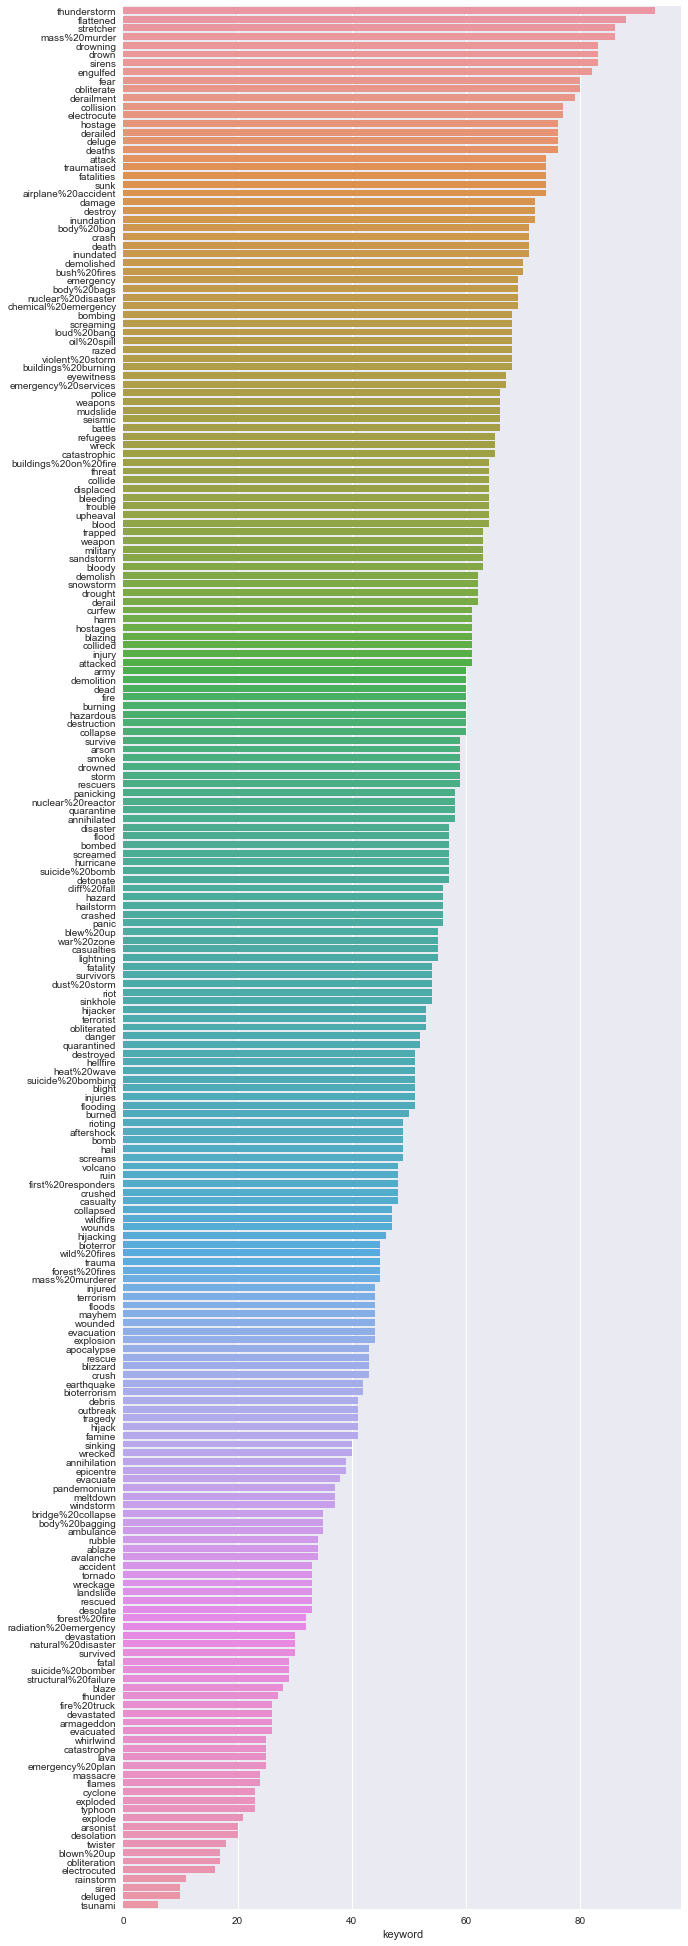

In [11]:
plt.figure(figsize=(10,35))
sns.barplot(y=df['keyword'].value_counts().index,x=df['keyword'].value_counts())

In [12]:
df['location'].value_counts().head(10)

United States      96
Australia          83
London, England    81
UK                 77
India              74
London             69
United Kingdom     59
USA                52
California, USA    47
Los Angeles, CA    45
Name: location, dtype: int64

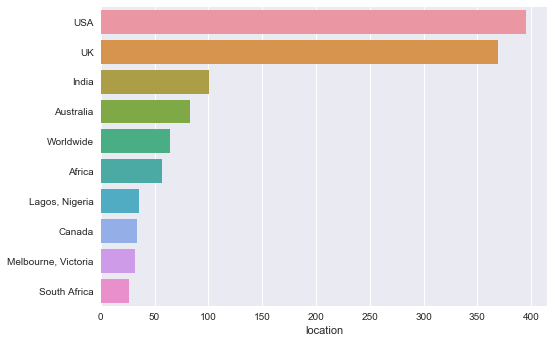

In [13]:
# Replacing the ambigious locations name with Standard names
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                           "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "England, United Kingdom":'UK',
                            "Mumbai, India":'India',
                            "Melbourne,Victoria":'Australia'},inplace=True)
sns.barplot(y=df['location'].value_counts()[:10].index,x=df['location'].value_counts()[:10])

In [14]:
'''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''

def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?:\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Applying the cleaning function to both test and training datasets
df['text'] = df['text'].apply(lambda x: clean_text(x))

df['text'].head()

0    communal violence in bhainsa telangana stones ...
1    telangana section  has been imposed in bhainsa...
2             arsonist sets cars ablaze at dealership 
3            arsonist sets cars ablaze at dealership  
4    lord jesus your love brings freedom and pardon...
Name: text, dtype: object

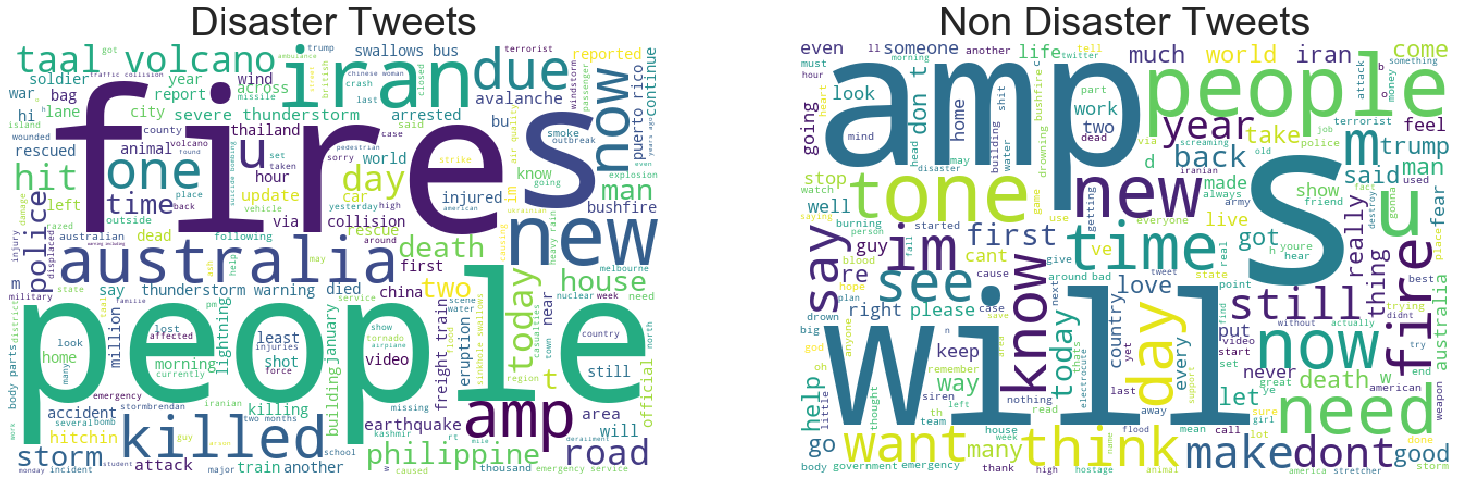

In [15]:
disaster_tweets=df[df['target']==1]['text']
non_disaster_tweets=df[df['target']==0]['text']

from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [16]:
# Stopword Removal
sw = set(stopwords.words('english'))
print(sw)

{'theirs', 'down', 'ma', 'yours', "don't", 'further', 'will', 'am', 'myself', 's', 'couldn', 'hasn', 'same', "wouldn't", 'only', 'into', 'they', 'through', 'again', 'haven', 'before', 'off', 'him', "couldn't", 'very', 'than', 'do', 'each', 'shouldn', 'it', 'that', 'for', 'during', 'some', "aren't", 'while', 'wouldn', 'mightn', "weren't", 'aren', "you're", 're', 'ours', 'over', 'there', 'won', 'hers', 'from', 'whom', 'having', 'in', "hadn't", 'itself', 'until', 'once', 'both', 'has', 'by', "should've", 'yourselves', 'of', 'which', "haven't", 'their', 'wasn', 'above', 'as', 'yourself', "that'll", 'were', "hasn't", 'against', 'not', "doesn't", 'needn', 'more', 'just', 'have', "won't", "shan't", 'any', 'was', 'ourselves', 'weren', 'an', 'nor', 'if', 'our', 'so', 've', 'a', 'he', 'hadn', 'with', "isn't", 'them', 'at', "you'll", 'its', 'isn', 'been', 'up', 'when', "didn't", 'and', 'to', "mustn't", 'but', 'ain', "she's", 'y', 'because', 'on', 't', 'under', 'those', 'most', 'then', 'how', 'sho

In [17]:
def remove_stopwords(text):
    useful_words = [w for w in text if w not in sw]
    return ' '.join(useful_words)

df["text"] = df["text"].str.split()
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

df['text'].head()

0    communal violence bhainsa telangana stones pel...
1    telangana section imposed bhainsa january clas...
2                 arsonist sets cars ablaze dealership
3                 arsonist sets cars ablaze dealership
4    lord jesus love brings freedom pardon fill hol...
Name: text, dtype: object

In [18]:
# Remove Emojis
import emoji
def convert_emojis(text):
    try:
        text = emoji.demojize(text)
    except:
        pass
    return text
df['text'] = df['text'].apply(convert_emojis)

In [19]:
df['text'].head()

0    communal violence bhainsa telangana stones pel...
1    telangana section imposed bhainsa january clas...
2                 arsonist sets cars ablaze dealership
3                 arsonist sets cars ablaze dealership
4    lord jesus love brings freedom pardon fill hol...
Name: text, dtype: object

In [20]:
#Stemming
def lem(text):
    lemmatizer=nltk.stem.WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in text]
    return ' '.join(lemmatized_words)

df["text"] = df["text"].str.split()
df['text'] = df['text'].apply(lambda x: lem(x))

df['text'].head()


0    communal violence bhainsa telangana stone pelt...
1    telangana section imposed bhainsa january clas...
2                   arsonist set car ablaze dealership
3                   arsonist set car ablaze dealership
4    lord jesus love brings freedom pardon fill hol...
Name: text, dtype: object

In [21]:
# Saving the Cleaned Data
df.to_csv("Cleaned_Data.csv",index=False)